<h1 style = 'font-size:40px'> Introduction to Machine Learning</h1>

<h1 style = 'font-size:30px'> Key Concepts in Machine Learning.</h1>
<h2 style = 'font-size:30px'> <em> Supervised Learning</em> </h2>
<div>
    <ul style = 'font-size:20px'> 
        <li> O Supervised Learning é a área do Machine Learning que lida com a previsão de resultados com base em dados que nós oferecemos ao nosso computador anteriormente.
        </li>
    </ul>
</div>

<h3 style = 'font-size:25px'> <u>Classification Models</u></h3>
<div>
    <ul style = 'font-size:20px'> 
        <li> Os modelos de classificação lidam com a previsão de outputs nominais. Ou seja, o que esperamos como retorno do computador é um texto.
        </li>
    </ul>
</div>

<h3 style = 'font-size:25px'> <u>Regression Models</u></h3>
<div>
    <ul style = 'font-size:20px'> 
        <li> Em modelos de regressão, o output esperado são números.
        </li>
    </ul>
</div>

<h2 style = 'font-size:30px'> Terminologia do Supervised Learning</h2>

<div>
    <ul style = 'font-size:20px'>
        <li> Os datasets de Supervised Learning são divididos em suas seções. A primeira (X), é constituída pelos dados quantitativos ou qualitativos a respeito do objeto sob análise. A segunda (Y), contém a identificação do objeto em si, podendo ser um nome (classification models) ou um número (regression models).
        </li>
    </ul>
</div>
    

<h2 style = 'font-size:30px'><em>Unsupervised Learning</em></h2>

<div>
    <ul style = 'font-size:20px'>
        <li> O Unsupervised Learning, por sua vez, não recebe um dataset com uma seção Y. Ou seja, recebemos dados sem qualquer tipo de classificação ou valor em relação a eles. 
        </li>
        
        <li style = 'margin-top:10px'> A intenção desse método de Machine Learning envolve descobrir padrões entre os dados recebidos. Como essas informações não recebem um rótulo, faz se necessário o uso da inteligência humana a fim de se enxergar as semelhanças e diferenças entre elas.
        </li>
    </ul>
</div>

<h2 style = 'font-size:30px'> <em>O ciclo de trabalho do Machine Learning</em> </h2>
<div>
    <ul style = 'font-size:20px'> 
        <li> Aplicar métodos de Machine Learning em um dataset requer a realização de um conjunto de etapas.
        </li>
    </ul>
</div>

<div>
    <center>
    <img src = 'ml_workflow.png'>
    </center>
</div>
    

<h1 style = 'font-size:30px'> An Example Machine Learning Problem</h1>

<div>
    <ul style = 'font-size:20px'>
        <li>Nesta aula, iremos construir um modelo de Aprendizado Supervisionado de identificação de frutas.
        </li>
    </ul>
</div>



In [1]:
%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib.pyplot
from sklearn.model_selection import train_test_split

In [2]:
fruits = pd.read_table('fruit_data_with_colors (1).txt')

In [3]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [18]:
%%HTML
<h1 style = 'font-size:20px'>Aqui, podemos enxgergar a escala de cores usada na coluna. 'color_score'.</h1>
<center>
<img src = 'color_scale.png'>
</center>

In [4]:
# Agora, utilizaremos train_test_split para treinar o nosso modelo de Machine Learning

# Definindo as colunas do X sample e Y sample.
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

<h1 style = 'font-size:30px'> Examining the Data</h1>

<div>
    <ul style = 'font-size:20px'>
        <li> Em Machine Learning, é muito importante utilizarmos métodos de visualização sobre nossos dados. Isso pode ser útil a fim de identificar possíveis defeitos nos números - como um outlier -, além de descobrir possíveis pares de características que possibilitam uma segregação bem definida das categorias que iremos analisar.
        </li>
    </ul>
</div>

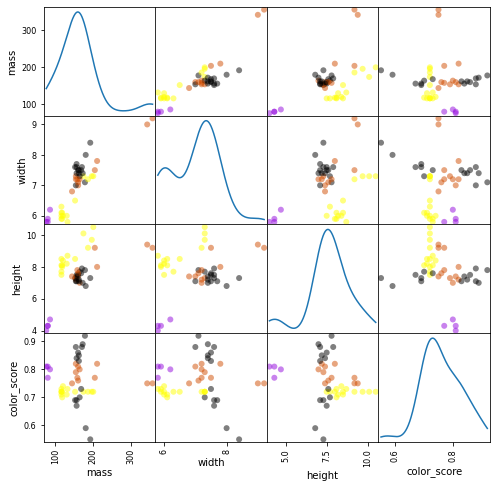

In [79]:
%matplotlib inline
from matplotlib import cm
# Aqui, construiremos um pairplot do seaborn.
cmap = cm.get_cmap('gnuplot')
pd.plotting.scatter_matrix(X_train, c = y_train, marker = 'o' ,cmap = cmap, figsize = (8, 8), diagonal = 'kde');

In [14]:
# Podemos visualizar os dados de uma maneira mais moderna: com um gráfico 3D!
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,7))
ax = plt.subplot(111, projection = '3d')
ax.scatter(X_train['height'], X_train['width'], X_train['color_score'], c = y_train, marker = 'o', s = 100,
          depthshade = True)
ax.set_xlabel('height')
ax.set_ylabel('width')
ax.set_zlabel('color_score')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, 'color_score')

<h1 style = 'font-size:30px'> K-Nearest Neighbors Classification</h1>

<div>
    <ul style = 'font-size:20px'>
        <li> O K-Nearest Neighbors é um algoritmo de Machine Learning Supervisionado que pode ser usado tanto em regressões, quanto em classificações.
        </li>
        
        <li> Basicamente, ele pega as informações dadas em X_train e produz um gráfico. Nele, os pontos de cada categoria definirão uma zona de influência; os pontos de X_test serão classificados de acordo com a sua posição no gráfico construído.
        </li>
    </ul>
    
</div>
<center>
<img src = 'knn_graph.png'>
</center>

<div>
    <ul style = 'font-size:20px'>
        <li> Observe o gráfico-exemplo do curso. Os pontos de cada amostra de fruta definem uma zona de influência 
                para a sua respectiva categoria. Dessa forma, o ponto de X_test que cair em (7, 9) será classificado como
                uma maçã.
        </li>
        
        <li> No entanto, caso definíssemos que o programa deve considerar os TRÊS pontos mais próximos daquele de nossa amostra de teste, poderíamos criar regras que buscam definir a maneira como rotularíamos a incógnita. Por exemplo, seria possível utilizar um voto por maioria simples ou escolher o nome do ponto mais próximo como rótulo.
        </li>
 
</ul>
</div>

In [22]:
# Partindo para o Machine Learning: precisamos importar as ferramentas necessárias e o dataset a ser usado.
%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib.pyplot
from sklearn.model_selection import train_test_split
fruits = pd.read_table('fruit_data_with_colors (1).txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [23]:
# A fim de nos auxiliar com o significado da coluna 'fruit_label', criaremos um dicionário.
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [44]:
# Segregando o nosso dataset em porções para treino e teste.
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [45]:
# Definindo um classificador KNN.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [46]:
# Treinando o nosso modelo com as amostras de treino
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
# Com o modelo pronto, vamos agora saber o quão preciso é ele com os dados de teste.

# A precisão do algoritmo é de 53%.
knn.score(X_test, y_test)

0.5333333333333333

In [55]:
# Além da precisão em si, é possível utilizar o algoritmo para fazê-lo tentar adivinhar o nome da fruta de 
# um certo conjunto de informações.

# Vamos usar a linha de index 33 de 'X_test'
fruit = knn.predict([[190, 7.5, 8.1, 0.74]]) 

# O algoritmo previu um limão, no entanto, a fruta é uma laranja.
print(lookup_fruit_name[fruit[0]], lookup_fruit_name[y_test.loc[33]])

lemon orange


In [71]:
# Agora, iremos explorar a influência da variável k_neighbors na precisão do modelo.
l = [[], []]
for i in range(1, len(X_test)):
    l[0].append(i)
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    l[1].append(score)

plt.plot(l[0], l[1])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …